# Capstone 3: Exploratory Data Analysis 
### By Joshua Dytko

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

We'll start by importing our cleand data from the data wrangling notebook

In [2]:
df = pd.read_csv('Cleaned data.csv', index_col = False)

In [3]:
df.head()

,rating,user_id,asin
0,5,A2M1CU2IRZG0K9,0005089549
1,5,AFTUJYISOFHY6,0005089549
2,5,A3JVF9Y53BEOGC,000503860X
3,5,A12VPEOEZS1KTC,000503860X
4,5,ATLZNVLYKP9AZ,000503860X


Lets start by checking some of the statistics of our data such as total number of ratings, total number of users and products, as well as the average number of ratings per user and ratings per asin.

In [4]:
n_ratings = len(df)
n_users = df['user_id'].nunique()
n_asin = df['asin'].nunique()

print(f'Number of ratings: {n_ratings}')
print(f'Number of users: {n_users}')
print(f'Number of products: {n_asin}')
print(f'Averae number of ratings per user: {n_ratings/n_users}')
print(f'Average numer of ratings per asin: {n_ratings/n_asin}')

Number of ratings: 3410019
Number of users: 297529
Number of products: 60175
Averae number of ratings per user: 11.461131519952676
Average numer of ratings per asin: 56.66836726215206


Next we will aggregate our data into a groupby dataframe aggregating the ratings mean and count for each user

In [5]:
df_groupby = df.groupby(by='user_id')['rating'].agg(['mean', 'count'])
print(f'Mean rating per user:\n{round(df_groupby.mean(),2)}')

Mean rating per user:
mean      4.26
count    11.46
dtype: float64


In [6]:
df_groupby.head()

,mean,count
user_id,,
A0009988MRFQ3TROTQPI,5.000000,8
A00311542N70JGNHUZPI,5.000000,5
A0040548BPHKXMHH3NTI,3.846154,13
A0045750NMY09KVSTE01,5.000000,10
A0048168OBFNFN7WW8XC,5.000000,5


In [7]:
df_groupby.reset_index(inplace=True)

In [8]:
df_groupby.head()

,user_id,mean,count
0,A0009988MRFQ3TROTQPI,5.000000,8
1,A00311542N70JGNHUZPI,5.000000,5
2,A0040548BPHKXMHH3NTI,3.846154,13
3,A0045750NMY09KVSTE01,5.000000,10
4,A0048168OBFNFN7WW8XC,5.000000,5


In [9]:
df_groupby['count'].describe()

count    297529.000000
mean         11.461132
std          24.909173
min           1.000000
25%           5.000000
50%           7.000000
75%          11.000000
max        3509.000000
Name: count, dtype: float64

In [10]:
d = pd.DataFrame(df_groupby['count'].value_counts())

In [11]:
d.head()

,count
count,
5,78518
6,49884
7,33798
8,24333
9,18047


In [12]:
df_groupby_rating = df.groupby(by='rating').count()

In [13]:
df_groupby_rating.head()

,user_id,asin
rating,,
1,193169,193169
2,172439,172439
3,349700,349700
4,665920,665920
5,2028791,2028791


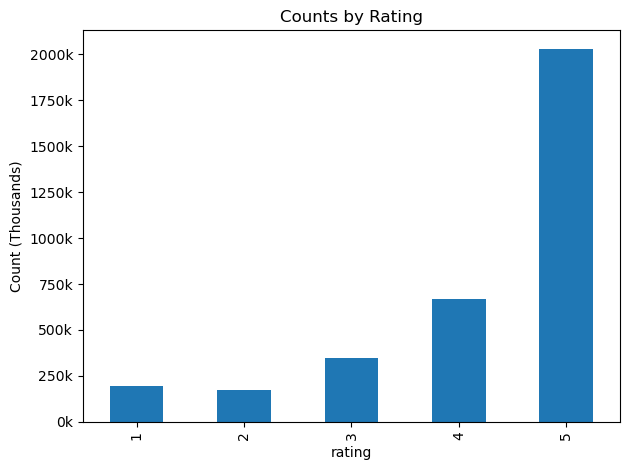

In [14]:

ax = df_groupby_rating['user_id'].plot(kind='bar')

def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'

# Apply formatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
ax.set_ylabel('Count (Thousands)')
ax.set_title('Counts by Rating')
ax.set_xlabel('rating')

plt.tight_layout()
plt.show()

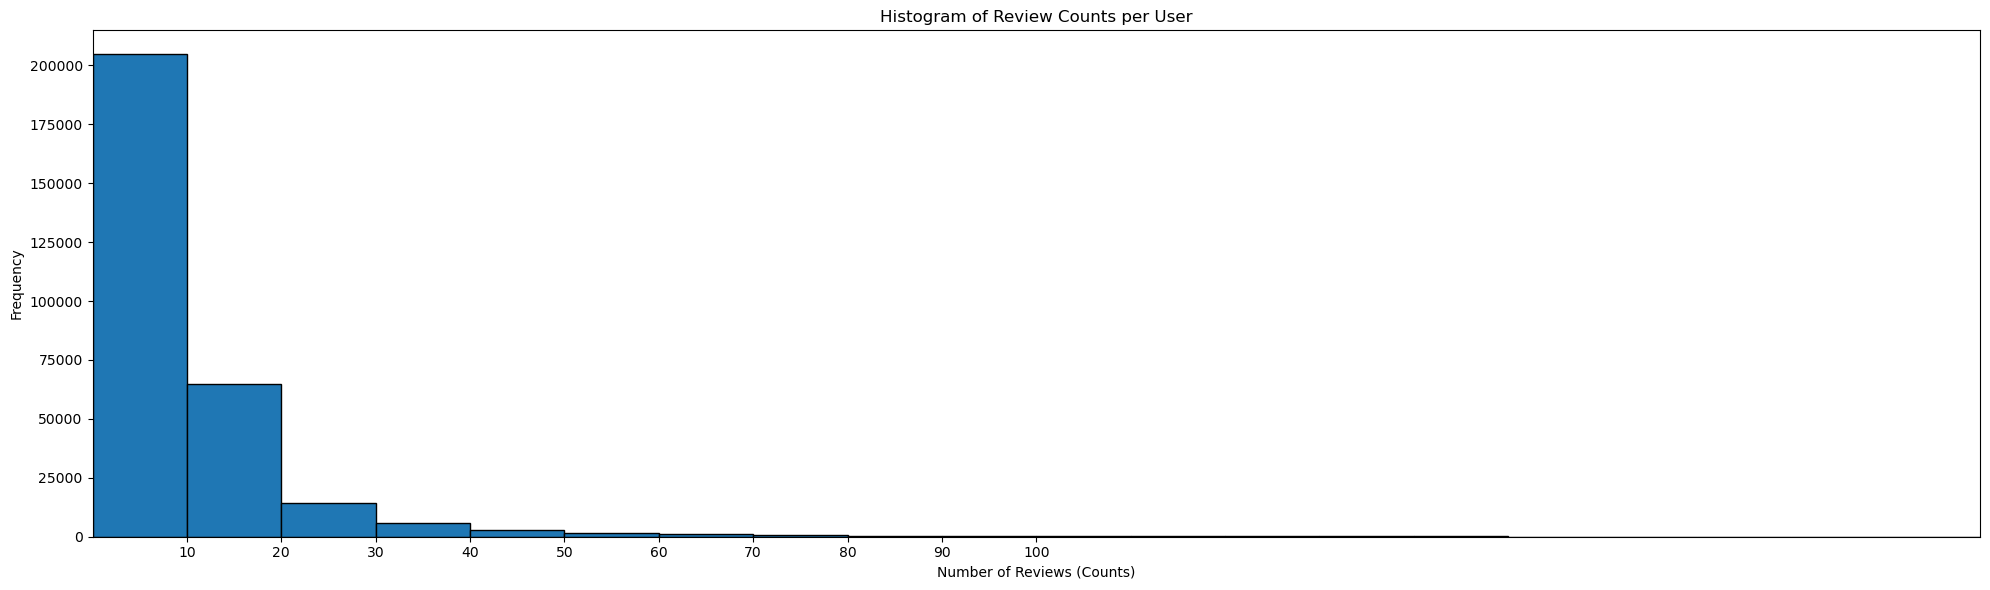

In [15]:
numbers = list(range(0, 1001, 10))
ax = df_groupby['count'].plot(kind='hist', bins=numbers, figsize=(20, 6), edgecolor='black', rwidth=20
                             ) #logx=True)

ax.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90,100, 1000, 10000])
ax.set_xlim(0,200)

# Set labels and title
ax.set_xlabel('Number of Reviews (Counts)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Review Counts per User')


# Optional: Improve layout
plt.tight_layout()

# Show the plot
plt.show()

the vast majority of users have less than 10 reviews with very few of them having more than 50.

In [16]:
df_groupby = df.groupby(by='asin')['rating'].agg(['mean', 'count'])
print(f'Mean rating per asin:\n{round(df_groupby.mean(),2)}')

Mean rating per asin:
mean      4.13
count    56.67
dtype: float64


In [17]:
df_groupby

,mean,count
asin,,
0000143588,5.000000,5
0001526863,4.928571,14
0005000009,4.046512,43
0005019281,4.425743,303
000503860X,4.666667,9
...,...,...
B01HHGAKEU,4.859813,107
B01HHRHDAI,4.625000,48
B01HIQ3TO2,4.250000,36


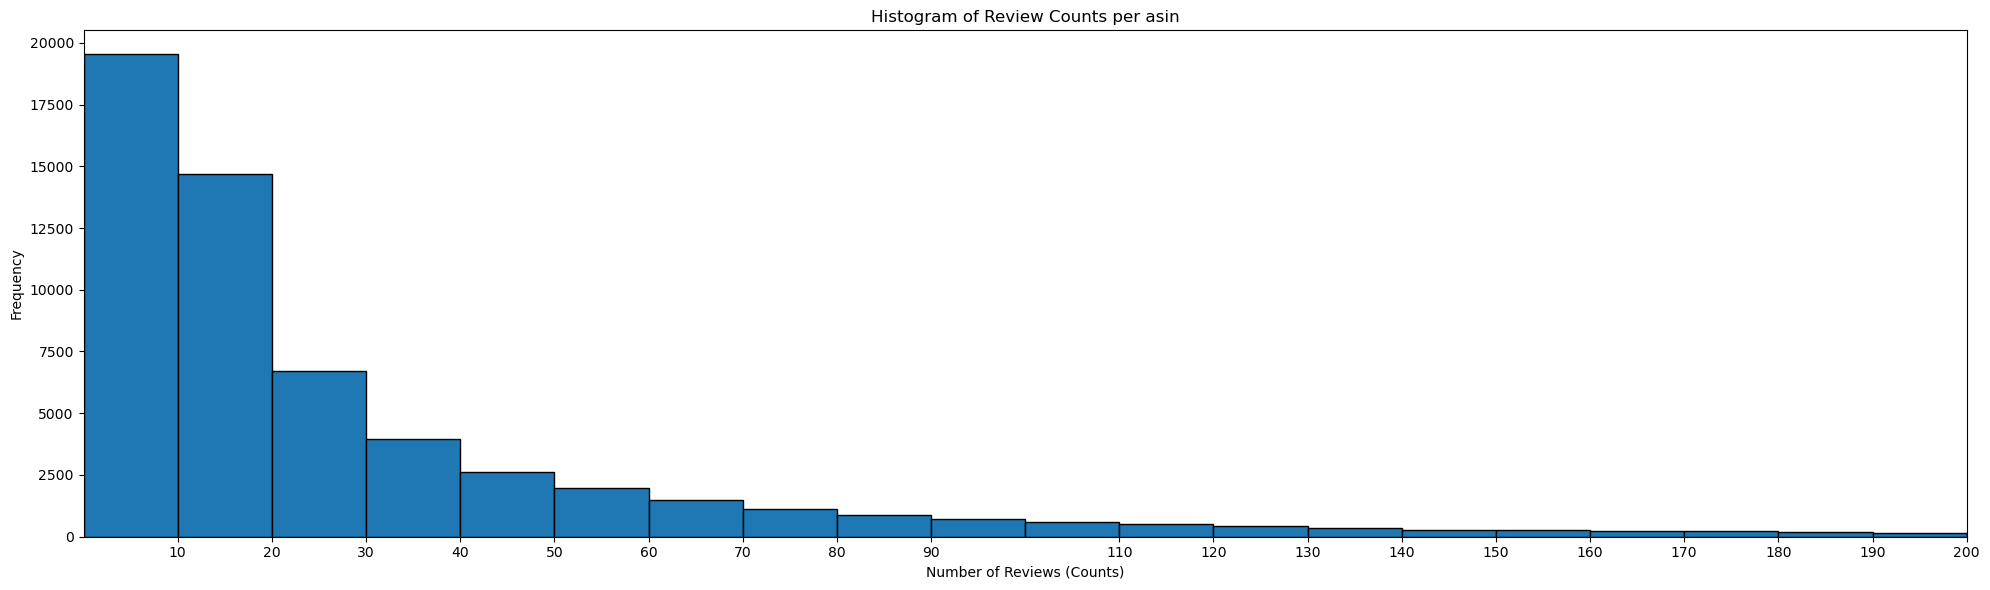

In [18]:
numbers = list(range(0, 1001, 10))
ax = df_groupby['count'].plot(kind='hist', bins=numbers, figsize=(20, 6), edgecolor='black', rwidth=20
                             ) #logx=True)

ax.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
ax.set_xlim(0,200)

# Set labels and title
ax.set_xlabel('Number of Reviews (Counts)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Review Counts per asin')


# Optional: Improve layout
plt.tight_layout()

# Show the plot
plt.show()

Contrasting with the user reviews where the majority of user's have less than 10 reviews, most asin have less than 20 reviews with there still being a sizable poulation from 20 to 50 reviews with a steady drop off going higher.

To build our item recommendation system I'll test multiple models. All the models will be collaberative based filtering because we do not have access the necessary data points in this data set for content-based filtering.